## Diabetic Retinopathy Detection

#### Model: ResNet 50

#### Importing necessary libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns  
import tensorflow as tf  
import seaborn as sns
from tensorflow import keras  
from tensorflow.keras import Layer  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Rescaling , GlobalAveragePooling2D
from tensorflow.keras import layers, optimizers, callbacks  
from tensorflow.keras import regularizers
from sklearn.utils.class_weight import compute_class_weight  
from sklearn.metrics import confusion_matrix, classification_report
import os
from pathlib import Path

#### Visualize sample images from each class

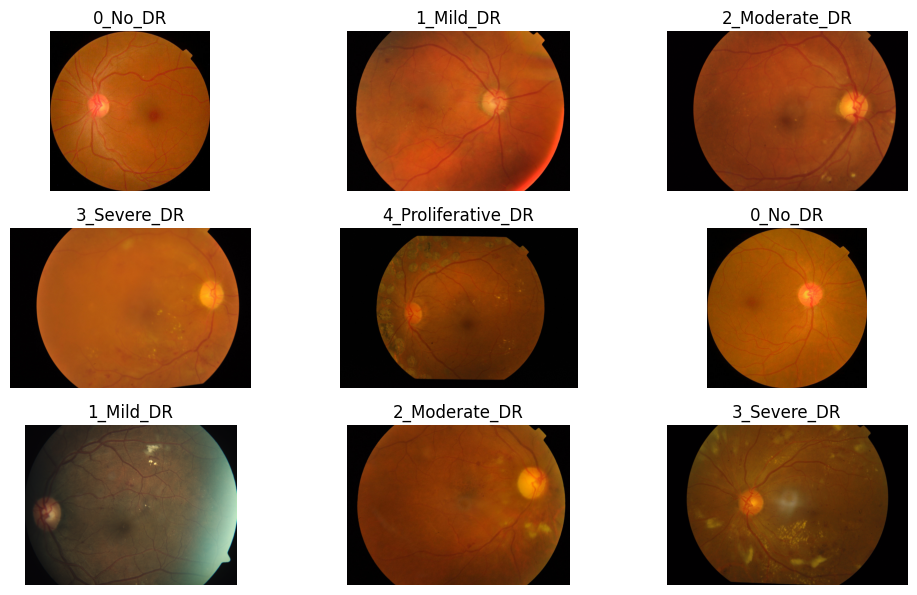

In [20]:
plt.figure(figsize=(10, 10))

categories = ['0_No_DR', '1_Mild_DR', '2_Moderate_DR', '3_Severe_DR', '4_Proliferative_DR']

for i in range(9):
    # selecting random images
    category = categories[i % 5]
    img_path = f"train_dataset/{category}"
    
    img_files = list(Path(img_path).glob("*.png"))
    if len(img_files) > i // 5:
        img = cv2.imread(str(img_files[i // 5]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        ax = plt.subplot(5, 3, i + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis("off")

plt.tight_layout()
plt.show()

#### Checking the class distribution in train dataset

C:\Users\Kanishk Pareek\AppData\Local\Temp\ipykernel_3996\3337342561.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x for x in range(5)], y=counts, palette='Accent', ax=ax)


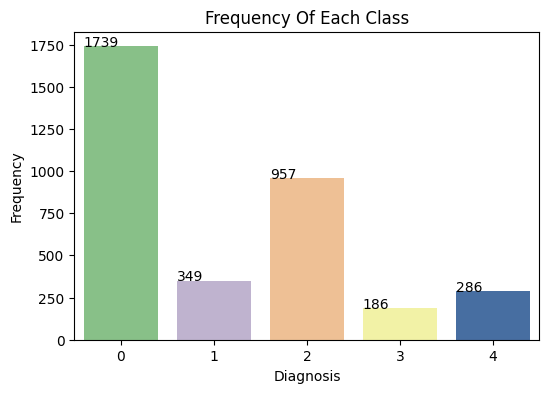

In [13]:
train_path = "train_dataset"
categories = ['0_No_DR', '1_Mild_DR', '2_Moderate_DR', '3_Severe_DR', '4_Proliferative_DR']

counts = []
for category in categories:
    folder_path = os.path.join(train_path, category)
    num_images = len([f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
    counts.append(num_images)

fig, ax = plt.subplots(figsize=(6, 4)) 
sns.barplot(x=[x for x in range(5)], y=counts, palette='Accent', ax=ax)

# putting counts on each bar
for p in ax.patches:
    ax.annotate('{}'.format(int(p.get_height())), (p.get_x(), p.get_height()))

plt.ylabel('Frequency')
plt.xlabel('Diagnosis')
plt.title('Frequency Of Each Class')
plt.show()

#### Checking the class distribution in validation dataset

C:\Users\Kanishk Pareek\AppData\Local\Temp\ipykernel_3996\3646059705.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x for x in range(5)], y=counts, palette='Accent', ax=ax)


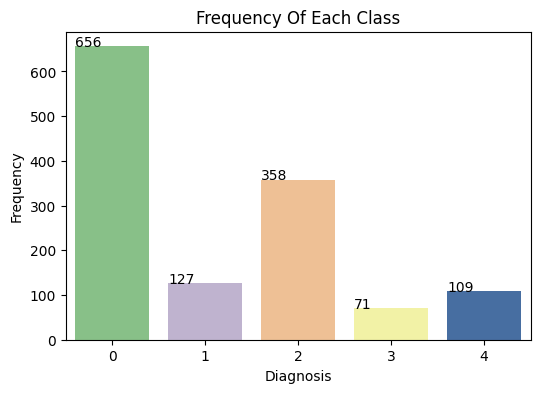

In [14]:
train_path = "val_dataset"
categories = ['0_No_DR', '1_Mild_DR', '2_Moderate_DR', '3_Severe_DR', '4_Proliferative_DR']

counts = []
for category in categories:
    folder_path = os.path.join(train_path, category)
    num_images = len([f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
    counts.append(num_images)

fig, ax = plt.subplots(figsize=(6, 4)) 
sns.barplot(x=[x for x in range(5)], y=counts, palette='Accent', ax=ax)

# putting counts on each bar
for p in ax.patches:
    ax.annotate('{}'.format(int(p.get_height())), (p.get_x(), p.get_height()))

plt.ylabel('Frequency')
plt.xlabel('Diagnosis')
plt.title('Frequency Of Each Class')
plt.show()

#### Data Preprocessing

##### 1) Cropping the images(removing the unwanted portion)

In [ ]:
def crop_image_from_gray(img, tol=7):
    """Remove black borders from retina images"""
    # for greysclae images
    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(axis=1), mask.any(axis=0))]
    
    # for RGB images
    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        mask = gray_img > tol
        
        check_shape = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))].shape[0]
        if check_shape == 0:
            return img
        else:
            img1 = img[:, :, 0][np.ix_(mask.any(axis=1), mask.any(axis=0))]
            img2 = img[:, :, 1][np.ix_(mask.any(axis=1), mask.any(axis=0))]
            img3 = img[:, :, 2][np.ix_(mask.any(axis=1), mask.any(axis=0))]
            img = np.stack([img1, img2, img3], axis=-1)
            return img


# process train_dataset
train_path = Path("train_dataset")
train_output = Path("train_dataset_cropped")

for category in train_path.iterdir():
    if category.is_dir():
        output_category = train_output / category.name
        output_category.mkdir(parents=True, exist_ok=True)
        
        for img_file in category.glob("*.png"):
            img = cv2.imread(str(img_file))
            img_cropped = crop_image_from_gray(img)
            cv2.imwrite(str(output_category / img_file.name), img_cropped)


# process val_dataset
val_path = Path("val_dataset")
val_output = Path("val_dataset_cropped")

for category in val_path.iterdir():
    if category.is_dir():
        output_category = val_output / category.name
        output_category.mkdir(parents=True, exist_ok=True)
        
        for img_file in category.glob("*.png"):
            img = cv2.imread(str(img_file))
            img_cropped = crop_image_from_gray(img)
            cv2.imwrite(str(output_category / img_file.name), img_cropped)

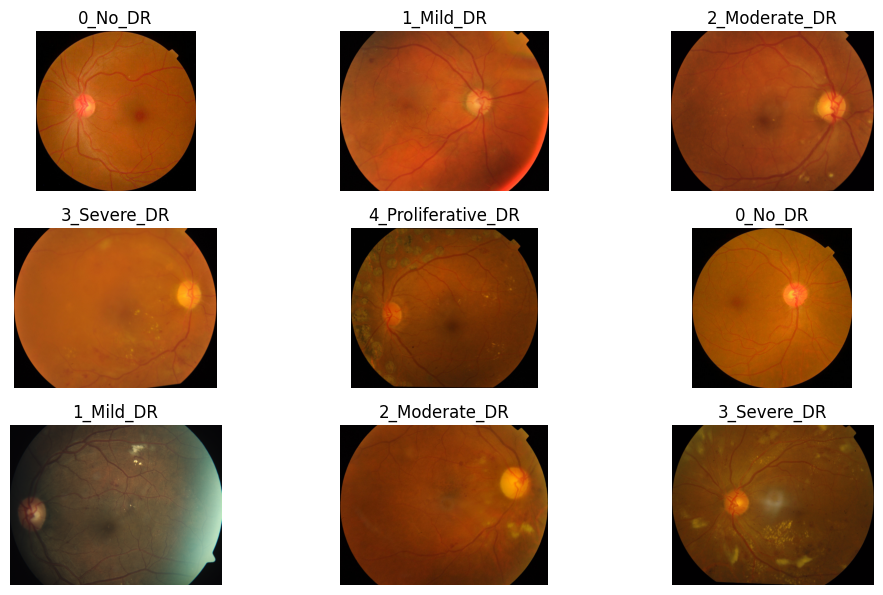

In [18]:
plt.figure(figsize=(10, 10))

categories = ['0_No_DR', '1_Mild_DR', '2_Moderate_DR', '3_Severe_DR', '4_Proliferative_DR']

for i in range(9):
    # selecting random images
    category = categories[i % 5]
    img_path = f"train_dataset_cropped/{category}"
    
    img_files = list(Path(img_path).glob("*.png"))
    if len(img_files) > i // 5:
        img = cv2.imread(str(img_files[i // 5]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        ax = plt.subplot(5, 3, i + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis("off")

plt.tight_layout()
plt.show()

#### 2) Applying CLAHE(Contrast Limited Adaptive Histogram Equalization) to enhance contrast

In [21]:
def apply_clahe(img):
    # convert BGR to LAB color space
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    
    # split LAB channels
    l, a, b = cv2.split(lab)
    
    # apply CLAHE to L channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_clahe = clahe.apply(l)
    
    # merge channels back
    lab_clahe = cv2.merge([l_clahe, a, b])
    
    # convert back to BGR
    img_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)
    
    return img_clahe


# process train_dataset_cropped
train_path = Path("train_dataset_cropped")
train_output = Path("train_dataset_clahe")

for category in train_path.iterdir():
    if category.is_dir():
        output_category = train_output / category.name
        output_category.mkdir(parents=True, exist_ok=True)
        
        for img_file in category.glob("*.png"):
            img = cv2.imread(str(img_file))
            img_clahe = apply_clahe(img)
            cv2.imwrite(str(output_category / img_file.name), img_clahe)


# process val_dataset_cropped
val_path = Path("val_dataset_cropped")
val_output = Path("val_dataset_clahe")

for category in val_path.iterdir():
    if category.is_dir():
        output_category = val_output / category.name
        output_category.mkdir(parents=True, exist_ok=True)
        
        for img_file in category.glob("*.png"):
            img = cv2.imread(str(img_file))
            img_clahe = apply_clahe(img)
            cv2.imwrite(str(output_category / img_file.name), img_clahe)

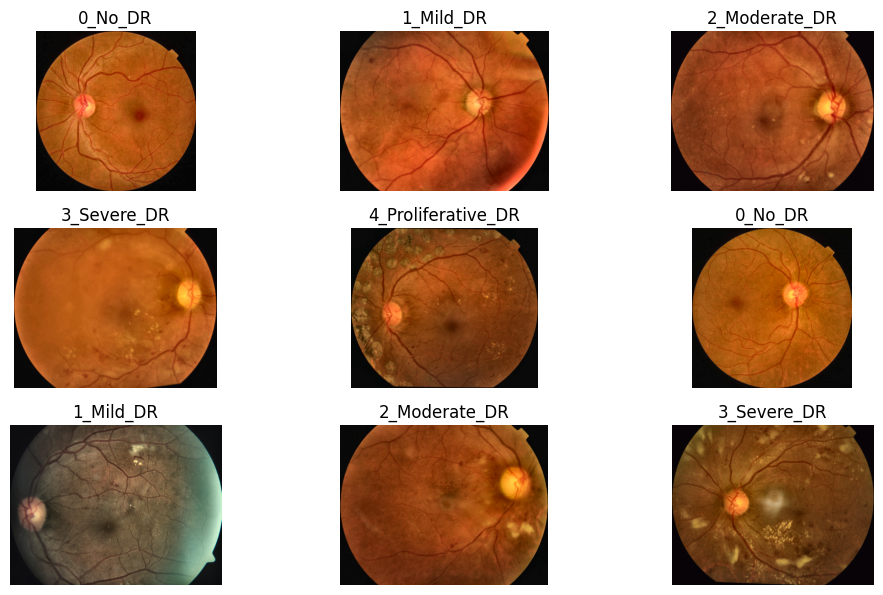

In [22]:
plt.figure(figsize=(10, 10))

categories = ['0_No_DR', '1_Mild_DR', '2_Moderate_DR', '3_Severe_DR', '4_Proliferative_DR']

for i in range(9):
    # selecting random images
    category = categories[i % 5]
    img_path = f"train_dataset_clahe/{category}"
    
    img_files = list(Path(img_path).glob("*.png"))
    if len(img_files) > i // 5:
        img = cv2.imread(str(img_files[i // 5]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        ax = plt.subplot(5, 3, i + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis("off")

plt.tight_layout()
plt.show()

In [11]:
img_size = (224, 224)  # ResNet50 input size
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "train_dataset_clahe",
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "val_dataset_clahe",
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical"
)

Found 3517 files belonging to 5 classes.
Found 1321 files belonging to 5 classes.


#### Assigning weights to classes(handling class imbalance)

In [12]:
from sklearn.utils.class_weight import compute_class_weight

class_names = train_ds.class_names

# counting class occurrences and preparing label list
class_counts = {i: 0 for i in range(len(class_names))}
all_labels = []

for images, labels in train_ds:
    for label in labels.numpy():
        label_idx = np.argmax(label)  # convert one-hot to class index
        class_counts[label_idx] += 1
        all_labels.append(label_idx)

# compute class weights
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(len(class_names)),
    y=all_labels
)

# create dictionary mapping class index to weight
class_weights = {i: w for i, w in enumerate(class_weights_array)}

print("Class weights:")
for i, name in enumerate(class_names):
    print(f"{name}: {class_weights[i]:.4f}")

Class weights:
0_No_DR: 0.4045
1_Mild_DR: 2.0155
2_Moderate_DR: 0.7350
3_Severe_DR: 3.7817
4_Proliferative_DR: 2.4594


#### Data Augmentaion and Normalization


In [21]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    tf.keras.layers.RandomContrast(0.2), 
])

In [22]:
def augment(images, labels):
    images = data_augmentation(images, training=True)
    return images, labels

In [23]:
def preprocess(images, labels):
    images = tf.keras.applications.resnet50.preprocess_input(images)
    return images, labels

In [24]:
# Training: Augmentation + Normalization
train_ds = train_ds.map(augment)
train_ds = train_ds.map(preprocess)

#Validation: Only Normalization
val_ds = val_ds.map(preprocess)

#### Defining the model

In [25]:
# ResNet50 base model
base_model = tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# freeze first 100 layers
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

# build model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax',kernel_regularizer=regularizers.l2(0.01))
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │        10,245 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,597,957 (90.02 MB)

 Trainable params: 19,463,173 (74.25 MB)

 Non-trainable params: 4,134,784 (15.77 MB)

#### Defining Callbacks

In [26]:
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-7,
    verbose=1
)

In [27]:
history = model.fit(
    train_ds,                           # Training dataset 
    validation_data=val_ds,             # Validation dataset to moitor
    epochs=30,                          # Train for up to 30 epoch
    batch_size=32,                      # Number of samples per training step
    class_weight=class_weights,
    callbacks=[early],                  # Stop early if validation loss doesn’t improve
    verbose=1                         
)

Epoch 1/30


110/110 ━━━━━━━━━━━━━━━━━━━━ 305s 3s/step - accuracy: 0.5573 - loss: 1.3986 - val_accuracy: 0.5382 - val_loss: 3.0596
Epoch 2/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 398s 4s/step - accuracy: 0.6705 - loss: 1.0985 - val_accuracy: 0.6442 - val_loss: 1.4334
Epoch 3/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 393s 4s/step - accuracy: 0.7208 - loss: 0.9669 - val_accuracy: 0.7237 - val_loss: 0.8780
Epoch 4/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 381s 3s/step - accuracy: 0.7532 - loss: 0.8948 - val_accuracy: 0.7017 - val_loss: 0.9297
Epoch 5/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 385s 3s/step - accuracy: 0.7620 - loss: 0.8512 - val_accuracy: 0.7812 - val_loss: 0.7380
Epoch 6/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 385s 3s/step - accuracy: 0.7887 - loss: 0.8002 - val_accuracy: 0.7805 - val_loss: 0.6896
Epoch 7/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 388s 4s/step - accuracy: 0.7828 - loss: 0.7645 - val_accuracy: 0.7896 - val_loss: 0.6549
Epoch 8/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 389s 4s/step - accuracy: 0.8172 - loss: 0.7039 - val_accuracy: 0.807

### Model Evaluation

#### Accuracy and Loss Plot

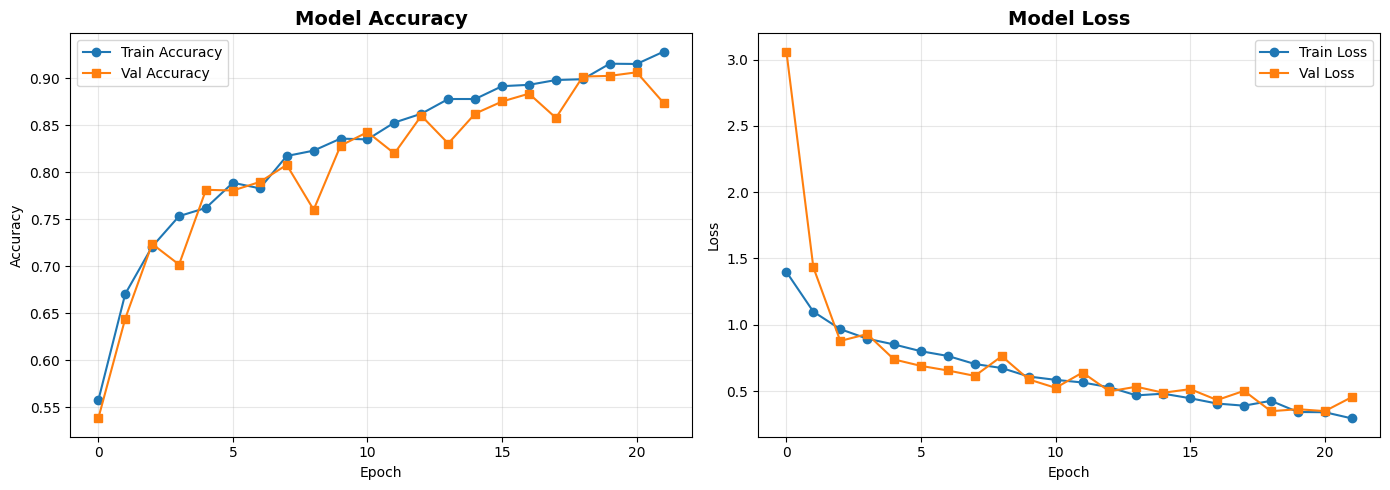

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy Plot
axes[0].plot(history.history['accuracy'], label='Train Accuracy', marker='o')
axes[0].plot(history.history['val_accuracy'], label='Val Accuracy', marker='s')
axes[0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss Plot
axes[1].plot(history.history['loss'], label='Train Loss', marker='o')
axes[1].plot(history.history['val_loss'], label='Val Loss', marker='s')
axes[1].set_title('Model Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Best Epoch Visualization

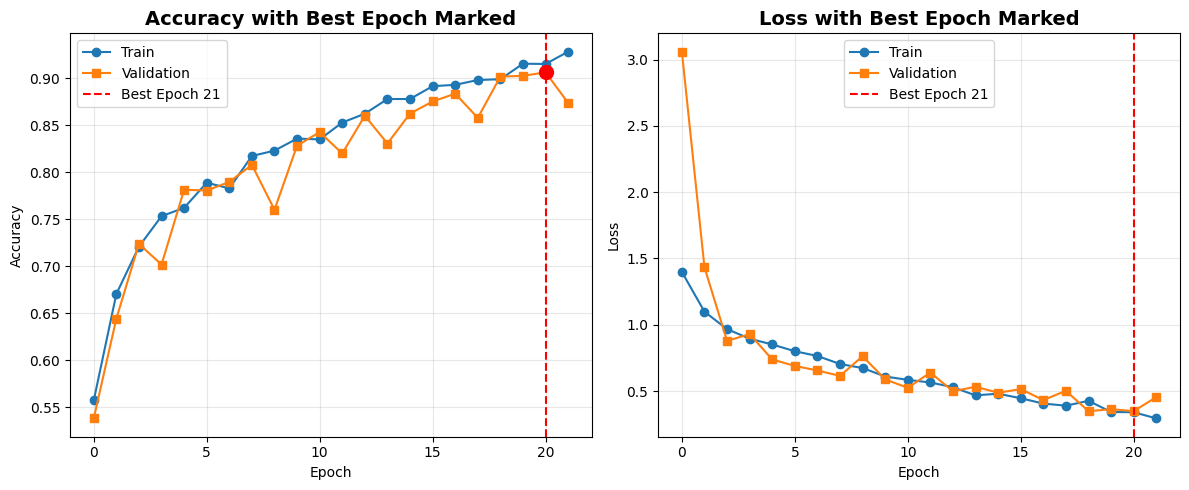

In [33]:
best_epoch = np.argmax(history.history['val_accuracy'])
best_val_acc = max(history.history['val_accuracy'])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation', marker='s')
plt.axvline(x=best_epoch, color='red', linestyle='--', label=f'Best Epoch {best_epoch+1}')
plt.scatter(best_epoch, best_val_acc, color='red', s=100, zorder=5)
plt.title('Accuracy with Best Epoch Marked', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train', marker='o')
plt.plot(history.history['val_loss'], label='Validation', marker='s')
plt.axvline(x=best_epoch, color='red', linestyle='--', label=f'Best Epoch {best_epoch+1}')
plt.title('Loss with Best Epoch Marked', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### Save the model

In [36]:
model.save("resnet50.keras")

#### Evaluation of the model

#### Confusion matrix and Classification report

Found 1321 files belonging to 5 classes.
Generating predictions...


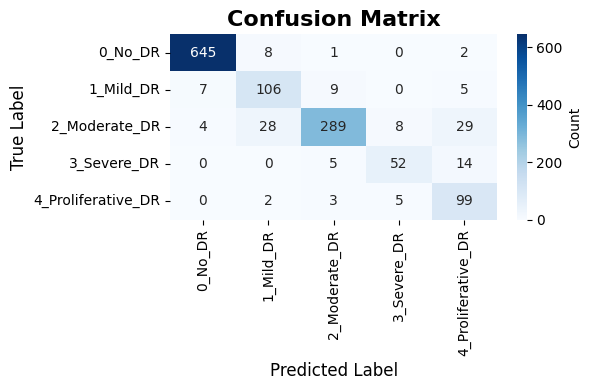


CLASSIFICATION REPORT
                    precision    recall  f1-score   support

           0_No_DR       0.98      0.98      0.98       656
         1_Mild_DR       0.74      0.83      0.78       127
     2_Moderate_DR       0.94      0.81      0.87       358
       3_Severe_DR       0.80      0.73      0.76        71
4_Proliferative_DR       0.66      0.91      0.77       109

          accuracy                           0.90      1321
         macro avg       0.83      0.85      0.83      1321
      weighted avg       0.91      0.90      0.90      1321


ACCURACY PER CLASS
0_No_DR: 98.32% (645/656)
1_Mild_DR: 83.46% (106/127)
2_Moderate_DR: 80.73% (289/358)
3_Severe_DR: 73.24% (52/71)
4_Proliferative_DR: 90.83% (99/109)


In [3]:
model = tf.keras.models.load_model('resnet50.keras')

img_size = (224, 224)
batch_size = 32

val_ds = tf.keras.utils.image_dataset_from_directory(
    "val_dataset_clahe",
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical",
    shuffle=False  # important for cm
)

class_names = val_ds.class_names

# applying normlization same as training
def preprocess(images, labels):
    images = tf.keras.applications.resnet50.preprocess_input(images)
    return images, labels

val_ds = val_ds.map(preprocess)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE) # Improves efficiency by loading the next batch in advance

y_true = []
y_pred = []

print("Generating predictions...")
for images, labels in val_ds:
    predictions = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(np.argmax(labels.numpy(), axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()


print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_true, y_pred, target_names=class_names))

# calculating accuracy per class
print("\n" + "="*60)
print("ACCURACY PER CLASS")
print("="*60)
for i, class_name in enumerate(class_names):
    class_correct = cm[i, i]
    class_total = cm[i].sum()
    class_accuracy = class_correct / class_total if class_total > 0 else 0
    print(f"{class_name}: {class_accuracy*100:.2f}% ({class_correct}/{class_total})")

#### Cohen Kappa Score

In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa_score = cohen_kappa_score(y_true, y_pred)

print("\n" + "="*60)
print("COHEN'S KAPPA SCORE")
print("="*60)
print(f"Kappa Score: {kappa_score:.4f}")

if kappa_score < 0:
    interpretation = "Poor agreement"
elif kappa_score < 0.20:
    interpretation = "Slight agreement"
elif kappa_score < 0.40:
    interpretation = "Fair agreement"
elif kappa_score < 0.60:
    interpretation = "Moderate agreement"
elif kappa_score < 0.80:
    interpretation = "Substantial agreement"
else:
    interpretation = "Almost perfect agreement"

print(f"Interpretation: {interpretation}")
print("="*60)


COHEN'S KAPPA SCORE
Kappa Score: 0.8527
Interpretation: Almost perfect agreement
